In [43]:
# Importing required Libraries:
import numpy as np
import pickle
import os
import seaborn as sns
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings; warnings.simplefilter('ignore')
%matplotlib inline


In [44]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

**Upload the datasets using the pandas**

In [45]:
ldp_data=pd.read_csv("/content/Liver_data.csv")

In [46]:
#reading the fisrt five dataset
ldp_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [47]:
#reading the last five dataset
ldp_data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [48]:
#shape of the datasets
ldp_data.shape

(583, 11)

In [49]:
#columns in the dataset
ldp_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [50]:
#datasets analysis
ldp_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Data Cleaning

In [51]:
#Checking for the empty data in the dataset
ldp_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [52]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature,these are null dataset:
print(ldp_data['Albumin_and_Globulin_Ratio'].median())
print(ldp_data['Albumin_and_Globulin_Ratio'].mean())

0.93
0.9470639032815197


In [53]:
#replace the empty data with the mean and meadia
ldp_data['Albumin_and_Globulin_Ratio'] = ldp_data['Albumin_and_Globulin_Ratio'].fillna(ldp_data['Albumin_and_Globulin_Ratio'].median())

In [54]:
#Checking for the empty data in the dataset
ldp_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [55]:
ldp_data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [56]:
ldp_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [57]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the "gender" column
ldp_data['Gender'] = label_encoder.fit_transform(ldp_data['Gender'])

Total Female : 142
Total Male : 441


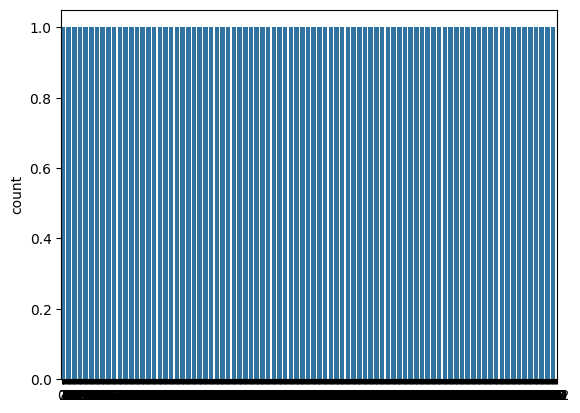

In [58]:
# Gender feature:
print("Total Female :", ldp_data['Gender'].value_counts()[0])
print("Total Male :", ldp_data['Gender'].value_counts()[1])

# Visualization:
sns.countplot(ldp_data['Gender'])
plt.show()

Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


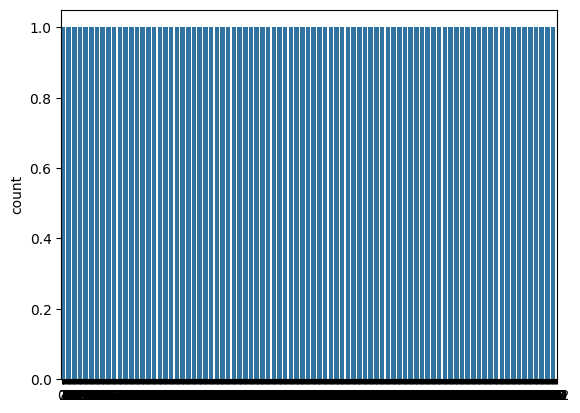

In [59]:
# Target feature:
print("Liver Disease Patients      :", ldp_data['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", ldp_data['Dataset'].value_counts()[2])

# Visualization:
sns.countplot(ldp_data['Dataset'])
plt.show()

In [60]:
#CORRELATION OF THE DATA IN HEATMAP
ldp_data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003184,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
Albumin_and_Globulin_Ratio,-0.215968,-0.003184,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144


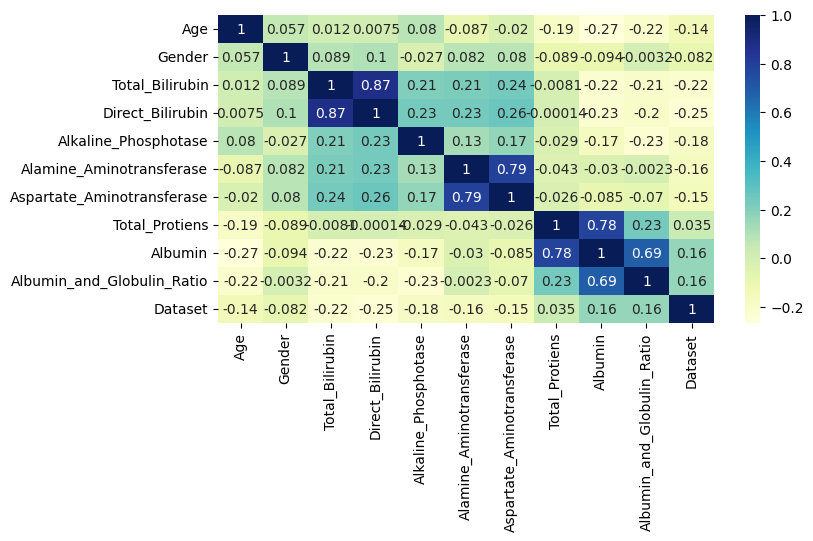

In [61]:
plt.figure(figsize=(8,4))
sns.heatmap(ldp_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [62]:
#assigning the target to variable y
#y is the output column
y=ldp_data.Dataset

In [63]:
#drop the variable y
#x is the input column
X=ldp_data.drop('Dataset', axis=1)

In [64]:
#split X and Y into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0 )

In [65]:
#number of observation in X_train,X_test, y_train,y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(466, 10) (117, 10) (466,) (117,)


SCALLING DATA

In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
X_train[0,0:30]

array([ 0.61337158,  0.58561035, -0.33789299, -0.40783724, -0.31345325,
       -0.33450163, -0.32189122, -0.24325881, -0.29278209, -0.4601453 ])

In [68]:
y_train[0:30]

362    2
421    2
400    2
449    1
235    1
516    1
78     2
458    1
336    1
96     1
332    1
498    1
170    1
89     1
247    1
415    1
268    1
46     1
511    1
107    2
343    1
350    1
0      1
524    2
71     1
560    1
102    1
369    1
108    2
213    1
Name: Dataset, dtype: int64

In [69]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = classifier.predict(X_test)

CHECKING ACCURACY WITH LR

In [71]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train,
                             cv = 10,
                             n_jobs = -1)
accuracies.mean()

0.7339962997224792

CONFUSION MATRIX FOR y-test and y prediction

              precision    recall  f1-score   support

 Non-disease       0.70      0.95      0.81        78
     Disease       0.67      0.21      0.31        39

    accuracy                           0.70       117
   macro avg       0.69      0.58      0.56       117
weighted avg       0.69      0.70      0.64       117



<Axes: >

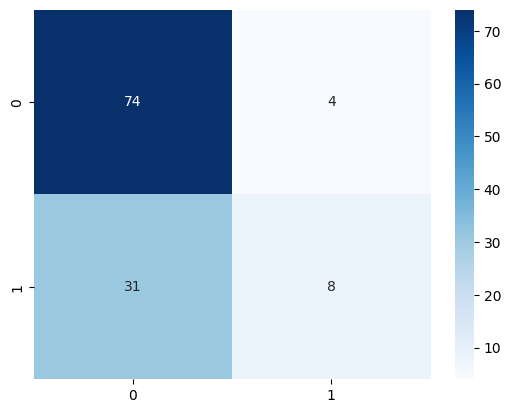

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['Non-disease', 'Disease']))

df_cm = pd.DataFrame(cm, range(2), range(2))
sns.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')

FEATURE **SELECTION**

In [75]:
# find best scored 5 features
select_feature = SelectKBest(k=10).fit(X_train, y_train)

In [76]:
#create the object of each algorithm we used
model1=KNeighborsClassifier(n_neighbors=5)
model2=LogisticRegression()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier(n_estimators=500)


In [77]:
#Train the model using fit
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)


RandomForestClassifier(n_estimators=500)

In [78]:
#predict the out from the trained model
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(X_test)


In [79]:
#calculated the accuracy of all the algorithms used
acc=accuracy_score(y_test,y_pred1, normalize=True)*float(100)
print("Accuracy of KNN is {:.2f}%".format(acc))
acc=accuracy_score(y_test,y_pred2, normalize=True)*float(100)
print("Accuracy of LR is {:.2f}%".format(acc))
acc=accuracy_score(y_test,y_pred3, normalize=True)*float(100)
print("Accuracy of DT is {:.2f}%".format(acc))
acc=accuracy_score(y_test,y_pred4, normalize=True)*float(100)
print("Accuracy of RT is {:.2f}%".format(acc))

Accuracy of KNN is 64.96%
Accuracy of LR is 70.09%
Accuracy of DT is 64.96%
Accuracy of RT is 69.23%


In [80]:
F1=f1_score(y_test,y_pred1)
print("F1_Score of KNN is {:.2f}%".format(acc))
F1=f1_score(y_test,y_pred2)
print("F1_Score of LR is {:.2f}%".format(acc))
F1=f1_score(y_test,y_pred3)
print("F1_Score of DT is {:.2f}%".format(acc))
F1=f1_score(y_test,y_pred4)
print("F1_Score of RT is {:.2f}%".format(acc))

F1_Score of KNN is 69.23%
F1_Score of LR is 69.23%
F1_Score of DT is 69.23%
F1_Score of RT is 69.23%


In [81]:
pre=precision_score(y_test,y_pred1)
print("Precision_score of KNN is {:.2f}%".format(acc))
pre=precision_score(y_test,y_pred2)
print("Precision_score of LR is {:.2f}%".format(acc))
pre=precision_score(y_test,y_pred3)
print("Precision_score of DT is {:.2f}%".format(acc))
pre=precision_score(y_test,y_pred4)
print("Precision_score of RT is {:.2f}%".format(acc))

Precision_score of KNN is 69.23%
Precision_score of LR is 69.23%
Precision_score of DT is 69.23%
Precision_score of RT is 69.23%


In [82]:
re= recall_score(y_test,y_pred1)
print("Recall_score of KNN is {:.2f}%".format(acc))
re= recall_score(y_test,y_pred2)
print("Recall_score of KNN is {:.2f}%".format(acc))
re= recall_score(y_test,y_pred3)
print("Recall_score of KNN is {:.2f}%".format(acc))
re= recall_score(y_test,y_pred4)
print("Recall_score of KNN is {:.2f}%".format(acc))

Recall_score of KNN is 69.23%
Recall_score of KNN is 69.23%
Recall_score of KNN is 69.23%
Recall_score of KNN is 69.23%


CROSS VALIDATION

In [83]:
#convert the final model into pickle to be used in frontend development
#save the model
joblib.dump(model4,'final_ldp_model.pk1')

['final_ldp_model.pk1']

In [84]:
#load the modelfrom the file
final_model=joblib.load('final_ldp_model.pk1')
pred=final_model.predict(X_test)

In [85]:
#check the accuracy again
acc=accuracy_score(y_test,pred, normalize=True)*float(100)
print("Final ldp model accuracy is {:.2f}%".format(acc))

Final ldp model accuracy is 69.23%


In [86]:
F1=f1_score(y_test,pred)
print("Final ldp model F1_score is {:.2f}%".format(acc))

Final ldp model F1_score is 69.23%
